(app:closet-approach)=
# The Closest Approach in a Scattering

A particle of mass $m_1$ elastically and another particle of mass $m_2$ collide via a spherical potential $U(r)$ where $r$ is the distance between the particles.  The trajectory of a particle in relative coordinates is shown in {numref}`fig:scattering-angle`.  The scattering angle $\theta$ depends on the impact parameter $b$ and the initial energy of the particles $E$.
For mathematical convenience, we introduce a new angle $\phi$ as shown in {numref}`fig:scattering-angle`.  Note that $\theta = \pi - 2 \phi$.
This scattering problem can be analytically solved  up to the following integral{cite}`Goldstein2001`:

$$
\phi = \int_{r_0}^{\infty} \frac{b}{r^2} \frac{1}{\sqrt{1 - \displaystyle\frac{b^2}{r^2}-\displaystyle\frac{U(r)}{E}}} dr\, .
$$

The lower integral bound $r_0$ is the closest distance between two particles determined by the equation:

$$
1 - \frac{b^2}{r_0^2}-\frac{U(r_0)}{E} = 0
$$(eq_closest)

which is a root finding problem.

```{figure} scattering-diagram.png
---
height: 300px
name: fig:scattering-angle
---
A trajectory of a point particle scatterd by a spherical potential centered at $O$.  The particle approaches to the potential with impact parameter $b$, reaches the closest point $r_0$, and then travels away with the scatering angle $\theta$.
```

First, we consider the Ratherford scattering where two particles of charge $Z_1 e$ and $Z_2 e$ collides with the Couolomb pontential, $U(r) = \displaystyle\frac{C}{r}$ where $C=Z_1 Z_2 e^2$.  For mathematical convenience, we chose $b$ and $C/b$ as units of distance and energy.   In order to avoid the devided-by-zero error, we introduce a new variable $x=1/r_0$.   Then, Eq. {eq}`eq_closest` becomes

$$
1 - x^2 - \frac{x}{E} = 0
$$

which is just a quadratic equation and its positive root is $\frac{1}{2} \left(\sqrt{\frac{1}{E^2} + 4} - \frac{1}{E}\right)$. We did not have to use a numerical method. Goint back to the original notation, we have the closest apprach:

$$
r_0 = \frac{2b}{\sqrt{\left(\frac{Z_1 Z_2 e^2}{Eb}\right)^2+4}-\frac{Z_1 Z_2 e^2}{Eb}}
$$

Now we consider a screened Coulomb potential (also known as Yukawak potential): $U(r) = \displaystyle\frac{C e^{-a r}}{r}$ where $a$ is a decay constant.  Using the same normalization as before,  Eq. {eq}`eq_closest` becomes

$$
1 - x^2 - \frac{x e^{-\alpha/x}}{E} = 0
$$

Note that when $a=0$ we have the Ratherford scattering.  We can test our numerical method against the special case.  Agreement with the exact solution will boost our confidence in the numerical method.



In [1]:
import numpy as np
from scipy.optimize import newton

# find a 
def root(E,a,q):
   
    def f(x):
        return 1 - x**2 - x*np.exp(-a/x)/E

    return newton(f,q)

# set energy (can be any positive number)
E = 1

# set decay constant
a = 0

# initial guess
q = 1

numerical=1./root(E,a,q)

exact = 2/(np.sqrt(1/E**2+4)-1/E)

print("numerical=",numerical)
print("    exact=",exact)

numerical= 1.6180339887498947
    exact= 1.6180339887498947


 The agreement is perfect.  Now, we are ready to calculate a realistic case. Let us calculate the closest approach $r_0$ as a function of the impact parameter $b$. We measure length and energy in $\mathring{A}$ and $eV$, respectively.  Then, the square of elemental charge is given by $e^2 \approx 14.2996\, eV \cdot \mathring{A}$.  Let us assume that $Z_1=Z_2=-1$ (Imagine the collision of two "classical" electrons.)  

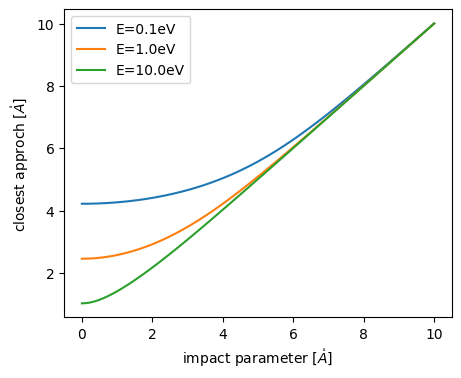

In [2]:
# Continues from the previous code cell

# set charge number
Z1 = 1
Z2 = 2
# set constant C
C = 14.3996*Z1*Z2

# set decay constant in inverse angstrom
a0 = 1.0

# set energy in eV
W=[0.1,1.0,10.0]

# set number of data points
N = 100

# set impact parameters from 0.01 to 10
b=np.linspace(0.01,10,N)
r0=np.zeros(N)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
for n in range(3):
    
    for k in range(N):
        
    # normalize energy and decay constant
        E = W[n]/C*b[k]
        a = a0*b[k]
        x = root(E,a,q)

        # back to the original closest approach
        r0[k]=b[k]/x
        
    plt.plot(b,r0,label=f"E={W[n]}eV")

plt.legend(loc=2)
plt.xlabel(r"impact parameter [$\mathring{A}$]")
plt.ylabel(r"closest approch [$\mathring{A}$]")
plt.show()

The closet approach strongly depends on the energy for small impact parameter.  For large impact parameter, it does not depend on the energy at all.  Furthermore, we notice that the impact parameter and the closest approach take the same value, suggesting that no collision takes place for the large impact parameter.  It just misses the target.  We will see more details on the classical scattering in {numref}`Chapter %s <ch:integral>`.


___

Updated on 4/16/2024 by R. Kawai